<a href="https://colab.research.google.com/github/RenanCostaNascimento/mestrado-reconhecimento-padroes/blob/main/Resolvendo_um_problema_de_classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vamos começar importando a base de dados [Heart Disease UCI do Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci). É um dataset que indica se a pessoa tem alguma condição cardíaca com base nas suas informações médicas.


In [48]:
import pandas as pd

dataset = pd.read_csv('/content/heart.csv')
dataset.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


Os dados da base de dados devem ser pré-processados. Para tanto, vamos começar separando os dados em uma matriz de features (dados de entrada) e um vetor coluna com as classes (última coluna – “target” – do arquivo csv).

In [49]:
import numpy as np

# transforma o dataset do pandas em np array
featureMatrix = dataset.to_numpy()

# extrai a ultima coluna da matrix
labels = featureMatrix[:,len(featureMatrix[0]) - 1]

# remove a ultima coluna da featureMatrix
featureMatrix = np.delete(featureMatrix, len(featureMatrix[0]) - 1, 1)

np.shape(featureMatrix), np.shape(labels)

((303, 13), (303,))

Agora vamos treinar um modelo da classe LinearRegression do scikit-learn com toda a base.

In [50]:
from sklearn.linear_model import LogisticRegression

# eu precisei colocar o max_iter=1000 porque estava dando esse erro sem ele:
#  ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
model = LogisticRegression(max_iter=1000)
model.fit(featureMatrix, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Com isso conseguimos calcular o MSE (erro quadrático médio) para o modelo treinado;

In [51]:
from sklearn.metrics import mean_squared_error

prediction = model.predict(featureMatrix)
mse = mean_squared_error(labels, prediction)
print(f"MSE: {mse}")
print(f"Intercept: {model.intercept_}")

MSE: 0.15181518151815182
Intercept: [2.74570516]


Por fim, vamos plotar três gráficos (2D) do MSE em função do atributo intercept_ da classe LogisticRegression. Para tanto, vamos manter os valores do atributo coef_ fixos e variar o valor de intercept_ entre intercept_ - delta e intercept_ + delta. No caso vamos definir três deltas destintos. Cada delta vai gerar uma variação, e cada variação vai gerar um gráfico.

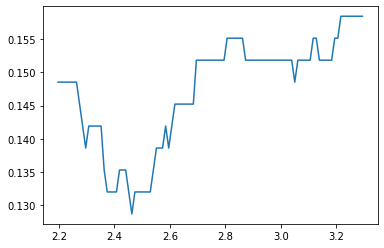

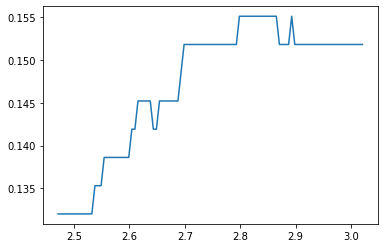

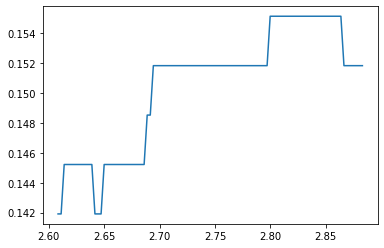

In [74]:
import matplotlib.pyplot as plt
import copy

deltaPercentages =  [0.2, 0.1, 0.05]
ws = []
for percentage in deltaPercentages:
  delta = model.intercept_ * percentage
  w = np.linspace(model.intercept_ - delta, model.intercept_ + delta, 100)
  ws.append(w)

def generateErrors(model, intercepts):
  errors = []
  for intercept in intercepts:
    model.intercept_ = intercept
    innerPrediction = model.predict(featureMatrix)
    innerMse = mean_squared_error(pricesVector, innerPrediction)
    errors.append(innerMse)
  return errors

plt.ylabel = "Error"
plt.xLabel = "W"

for w in ws:
  modelCopy = copy.deepcopy(model)
  errors = generateErrors(modelCopy, w)
  plt.plot(w, errors)
  plt.show()